In [1]:
import classy
from classy import Class
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('Minh_paper_style')
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif"
})
import matplotlib
import matplotlib.cm
from matplotlib.ticker import (FixedLocator, MultipleLocator, FixedFormatter, FormatStrFormatter,
                               AutoMinorLocator)

In [40]:
zp=0.0

#settings to configure CLASS computations
fid_settings = {
    'output': 'mPk', #which quantities we want CLASS to compute
    'z_pk' : zp,
    'non linear' : 'none',
    'P_k_max_1/Mpc': 1.0,
    'k_pivot': 0.05,
}

fid_params = {
    #'h': 0.676225,
    'omega_b': 0.0222554,
    'omega_cdm': 0.118967,
    'A_s': 1.5e-09,
    'n_s': 0.991533,
    'N_ur': 2.0328,
    'N_ncdm' : 1.0,
    'm_ncdm' : 0.06,
    'omega_ncdm': 0.00064420,
    '100*theta_s' : 1.041533,
    'recombination' : 'HyRec',
    'tau_reio' : 0.0544
}

nonu_params = {
    #'h': 0.676225,
    'omega_b': 0.0222554,
    'omega_cdm': 0.118967+0.00064420,
    'A_s': 2.1e-09,
    'n_s': 0.991533,
    #'N_ur': 2.0328,
    #'N_ncdm' : 1.0,
    #'m_ncdm' : 0.0,
    #'omega_ncdm': 0.00064420,
    'N_ncdm' : 0.0,
    '100*theta_s' : 1.041533,
    'recombination' : 'HyRec',
    'tau_reio' : 0.0544
}

## Compute CLASS $P(k)$

In [41]:
fid_cosmo = Class();
fid_cosmo.set(fid_settings)
fid_cosmo.set(fid_params)
fid_cosmo.compute()

nonu_cosmo = Class();
nonu_cosmo.set(fid_settings)
nonu_cosmo.set(nonu_params)
nonu_cosmo.compute()

print(fid_cosmo.get_current_derived_parameters(['Omega_Lambda','Omega_m']))
print(nonu_cosmo.get_current_derived_parameters(['Omega_Lambda','Omega_m']))

{'Omega_Lambda': 0.6896824760203704, 'Omega_m': 0.3102383341224314}
{'Omega_Lambda': 0.6924762976731776, 'Omega_m': 0.3074330389501991}


In [42]:
print(fid_cosmo.sigma8())
print(nonu_cosmo.sigma8())

0.6897058918647396
0.8318728648734357


## Load CAMB $P(k)$

In [43]:
CAMB_Pk_file='./Pk.dat'
k=np.loadtxt(CAMB_Pk_file,usecols=0)
CAMB_Pk=np.loadtxt(CAMB_Pk_file,usecols=1)

## Retrieve CLASS $P(k)$ values at $k$ in CAMB $P(k)$ vector

In [44]:
# get P(k) at redhsift z=zp
import numpy as np
CLASS_fid_Pk = [] # P(k) in (Mpc/h)**3
CLASS_nonu_Pk = [] # P(k) in (Mpc/h)**3

h = nonu_cosmo.h() # get reduced Hubble for conversions to 1/Mpc
for CLASS_k in k:
    CLASS_fid_Pk.append(fid_cosmo.pk(CLASS_k*fid_cosmo.h(),0.)*fid_cosmo.h()**3) # function .pk(k,z)
for CLASS_k in k:
    CLASS_nonu_Pk.append(nonu_cosmo.pk(CLASS_k*nonu_cosmo.h(),0.)*nonu_cosmo.h()**3) # function .pk(k,z)
CLASS_fid_Pk=np.asarray(CLASS_fid_Pk)
CLASS_nonu_Pk=np.asarray(CLASS_nonu_Pk)

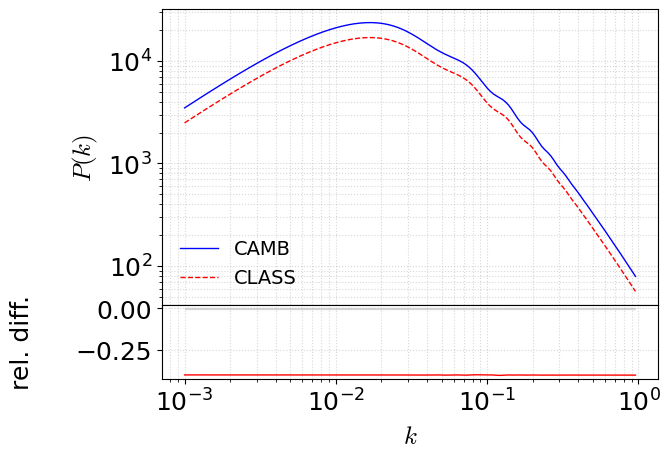

In [45]:
fig, ax = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0., 'wspace':0., 'height_ratios':[8, 2]}, figsize=(6.4, 4.8))
ax[0].loglog(k,CAMB_Pk,ls='-',c='b',label=r'CAMB')
ax[0].loglog(k,CLASS_fid_Pk,ls='--',c='r',label=r'CLASS')
ax[0].grid(True, which="both", ls=":",alpha=0.5)
ax[1].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$P(k)$')
ax[1].semilogx(k,(CLASS_fid_Pk-CAMB_Pk)/CLASS_fid_Pk,color='r')
#ax[1].yaxis.tick_right()
ax[1].fill_between(k,y1=-0.001,y2=0.001,color='silver',alpha=0.5)
ax[1].grid(True,which="both",ls=':',alpha=0.5)
ax[1].set_ylabel(r'rel. diff.',labelpad=30)
ax[0].legend(frameon=False,loc='lower left',fontsize=14);

## Save CLASS $P(k)$

In [46]:
#CLASS_fid_Pk_file='./CLASS_Pk_fixedIC.dat'
#np.savetxt(CLASS_fid_Pk_file,np.c_[k,CLASS_fid_Pk])

In [47]:
CLASS_nonu_Pk_file='../LEFTFIELD_input/CLASS_nonu_Pk.dat'
np.savetxt(CLASS_nonu_Pk_file,np.c_[k,CLASS_nonu_Pk])

In [48]:
fid_file='/cobra/u/minh/Beyond2ptMock/LEFTFIELD_input/CLASS_Pk_fixedIC.dat'
fid_Pk=np.loadtxt(fid_file,usecols=1)
nonu_file='../LEFTFIELD_input/CLASS_nonu_Pk.dat'
nonu_Pk=np.loadtxt(nonu_file,usecols=1)

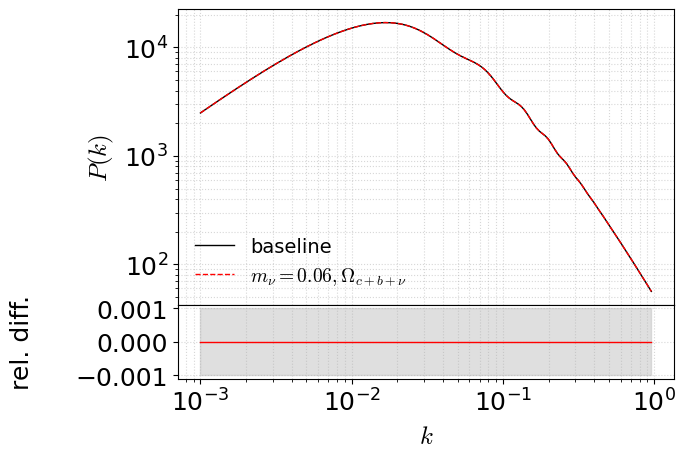

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0., 'wspace':0., 'height_ratios':[8, 2]}, figsize=(6.4, 4.8))
ax[0].loglog(k,fid_Pk,ls='-',c='k',label=r'baseline')
ax[0].loglog(k,CLASS_fid_Pk,ls='--',c='r',label=r'$m_\nu=0.06,\Omega_{c+b+\nu}$')
#ax[0].loglog(k,nonu_Pk,ls='--',c='b',label=r'$m_\nu=0.0$')
ax[0].grid(True, which="both", ls=":",alpha=0.5)
ax[1].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$P(k)$')
ax[1].semilogx(k,(CLASS_fid_Pk-fid_Pk)/CLASS_fid_Pk,color='r')
#ax[1].yaxis.tick_right()
ax[1].fill_between(k,y1=-0.001,y2=0.001,color='silver',alpha=0.5)
ax[1].grid(True,which="both",ls=':',alpha=0.5)
ax[1].set_ylabel(r'rel. diff.',labelpad=30)
ax[0].legend(frameon=False,loc='lower left',fontsize=14);

(0.0, 0.5)

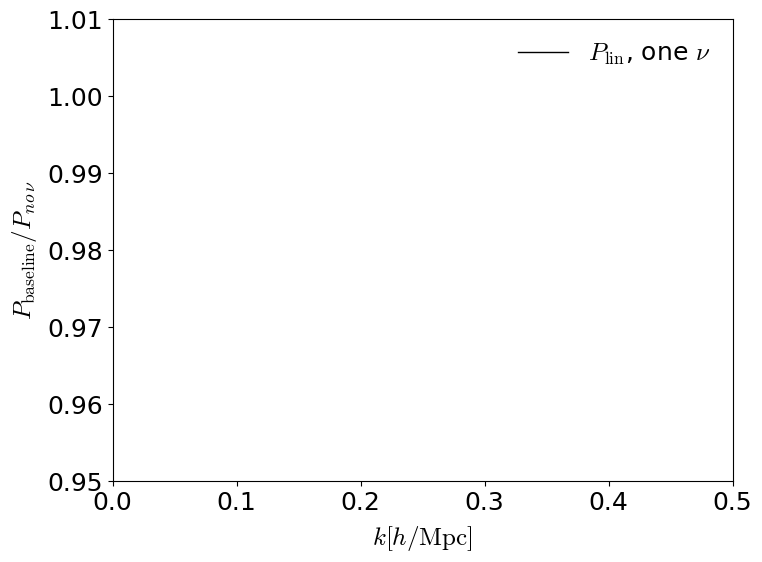

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(k,CLASS_fid_Pk/CLASS_nonu_Pk,ls='-',c='k',label=r'$P_{\mathrm{lin}}$, one $\nu$')
ax.set_xlabel(r'$k[h/\mathrm{Mpc}]$')
ax.set_ylabel(r'$P_{\mathrm{baseline}}/P_{no\,\nu}$')
ax.legend(frameon=False)
ax.set_ylim(0.95,1.01)
ax.set_xlim(0.,0.5)